---------------

**If any part of this notebook is used in your research, please cite with the reference found in** **[README.md](https://github.com/pysal/spaghetti#bibtex-citation).**


----------------
## Quickstart
### Creating and visualizing a `spaghetti.Network` object

**Author: James D. Gaboardi** **<jgaboardi@gmail.com>**

**This notebook is a basic walk-through for:**

1. Instantiating a network
2. Allocating observations to a network (snapping points)
3. Visualizing the original and network-snapped locations with `geopandas` and `matplotlib`

In [1]:
%load_ext watermark
%watermark

2020-03-27T11:11:19-04:00

CPython 3.7.3
IPython 7.10.2

compiler   : Clang 9.0.0 (tags/RELEASE_900/final)
system     : Darwin
release    : 19.4.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit


In [2]:
import geopandas
import libpysal
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib_scalebar
from matplotlib_scalebar.scalebar import ScaleBar
import spaghetti
%matplotlib inline
%watermark -w
%watermark -iv

watermark 2.0.2
geopandas           0.7.0
libpysal            4.2.2
spaghetti           1.4.2.post2
matplotlib_scalebar 0.6.1
matplotlib          3.1.2



In [3]:
try:
    from IPython.display import set_matplotlib_formats
    set_matplotlib_formats("retina")
except ImportError:
    pass

------------------------------
### 1. Instantiating a `spaghetti.Network` object
#### Instantiate the network from a `.shp` file

In [4]:
ntw = spaghetti.Network(in_data=libpysal.examples.get_path("streets.shp"))

------------------------------
### 2. Allocating observations (snapping points) to a network:
#### Schools without attributes

In [5]:
ntw.snapobservations(
    libpysal.examples.get_path("schools.shp"), "schools", attribute=False
)

#### True vs. snapped school coordinates comparison:  `spaghetti.Network` attributes

In [6]:
print("observation 1\ntrue coords:\t%s\nsnapped coords:\t%s" % (
    ntw.pointpatterns["schools"].points[0]["coordinates"],
    ntw.pointpatterns["schools"].snapped_coordinates[0]
))

observation 1
true coords:	(727082.0462136, 879863.260705768)
snapped coords:	(727287.6644417326, 879867.3863186113)


#### Crimes with attributes

In [7]:
ntw.snapobservations(
    libpysal.examples.get_path("crimes.shp"), "crimes", attribute=True
)

#### True vs. snapped crime coordinates comparison: `spaghetti.Network` attributes

In [8]:
print("observation 1\ntrue coords:\t%s\nsnapped coords:\t%s" % (
    ntw.pointpatterns["crimes"].points[0]["coordinates"],
    ntw.pointpatterns["crimes"].snapped_coordinates[0]
))

observation 1
true coords:	(727913.0000000029, 875720.9999999977)
snapped coords:	(727919.2473619275, 875942.4986759046)


------------------------------
### 3. Visualizing original and snapped locations
#### True and snapped school locations

In [9]:
true_schools_df = spaghetti.element_as_gdf(
    ntw, pp_name="schools", snapped=False
)
snapped_schools_df = spaghetti.element_as_gdf(
    ntw, pp_name="schools", snapped=True
)

#### True vs. snapped school coordinates comparison: `geopandas.GeoDataFrame`

In [10]:
# Compare true point coordinates & snapped point coordinates
print("observation 1\ntrue coords:\t%s\nsnapped coords:\t%s" % (
    true_schools_df.geometry[0].coords[:][0],
    snapped_schools_df.geometry[0].coords[:][0]
))

observation 1
true coords:	(727082.0462136, 879863.260705768)
snapped coords:	(727287.6644417326, 879867.3863186113)


#### True and snapped crime locations

In [11]:
true_crimes_df = spaghetti.element_as_gdf(
    ntw, pp_name="crimes", snapped=False
)
snapped_crimes_df = spaghetti.element_as_gdf(
    ntw, pp_name="crimes", snapped=True
)

#### True vs. snapped crime coordinates comparison: `geopandas.GeoDataFrame`

In [12]:
print("observation 1\ntrue coords:\t%s\nsnapped coords:\t%s" % (
    true_crimes_df.geometry[0].coords[:][0],
    snapped_crimes_df.geometry[0].coords[:][0]
))

observation 1
true coords:	(727913.0000000029, 875720.9999999977)
snapped coords:	(727919.2473619275, 875942.4986759046)


#### Create `geopandas.GeoDataFrame` objects of the vertices and arcs

In [13]:
# network nodes and edges
vertices_df, arcs_df = spaghetti.element_as_gdf(ntw, vertices=True, arcs=True)

#### Create legend patches for the `matplotlib` plot

In [14]:
# create legend arguments and keyword arguments for matplotlib
args = [], []
kwargs = {"c":"k"}

# set arcs legend entry
arcs = mlines.Line2D(*args, **kwargs, label="Network Arcs", alpha=0.5)

# update keyword arguments for matplotlib
kwargs.update({"lw":0})

# set vertices legend entry
vertices = mlines.Line2D(
    *args, **kwargs, ms=2.5, marker="o", label="Network Vertices"
)

In [15]:
# set true school locations legend entry
tschools = mlines.Line2D(
    *args, **kwargs, ms=25, marker="X", label="School Locations"
)
# set network-snapped school locations legend entry
sschools = mlines.Line2D(
    *args, **kwargs, ms=12, marker="o", label="Snapped Schools"
)

In [16]:
# update keyword arguments for matplotlib
kwargs.update({"c":"r", "alpha":0.75})

# set true crimes locations legend entry
tcrimes = mlines.Line2D(
    *args, **kwargs, ms=7, marker="x", label="Crime Locations"
)
# set network-snapped crimes locations legend entry
scrimes = mlines.Line2D(
    *args, **kwargs, ms=3, marker="o", label="Snapped Crimes"
)

In [17]:
# combine all legend patches
patches = [arcs, vertices, tschools, sschools, tcrimes, scrimes]

#### Plotting `geopandas.GeoDataFrame` objects

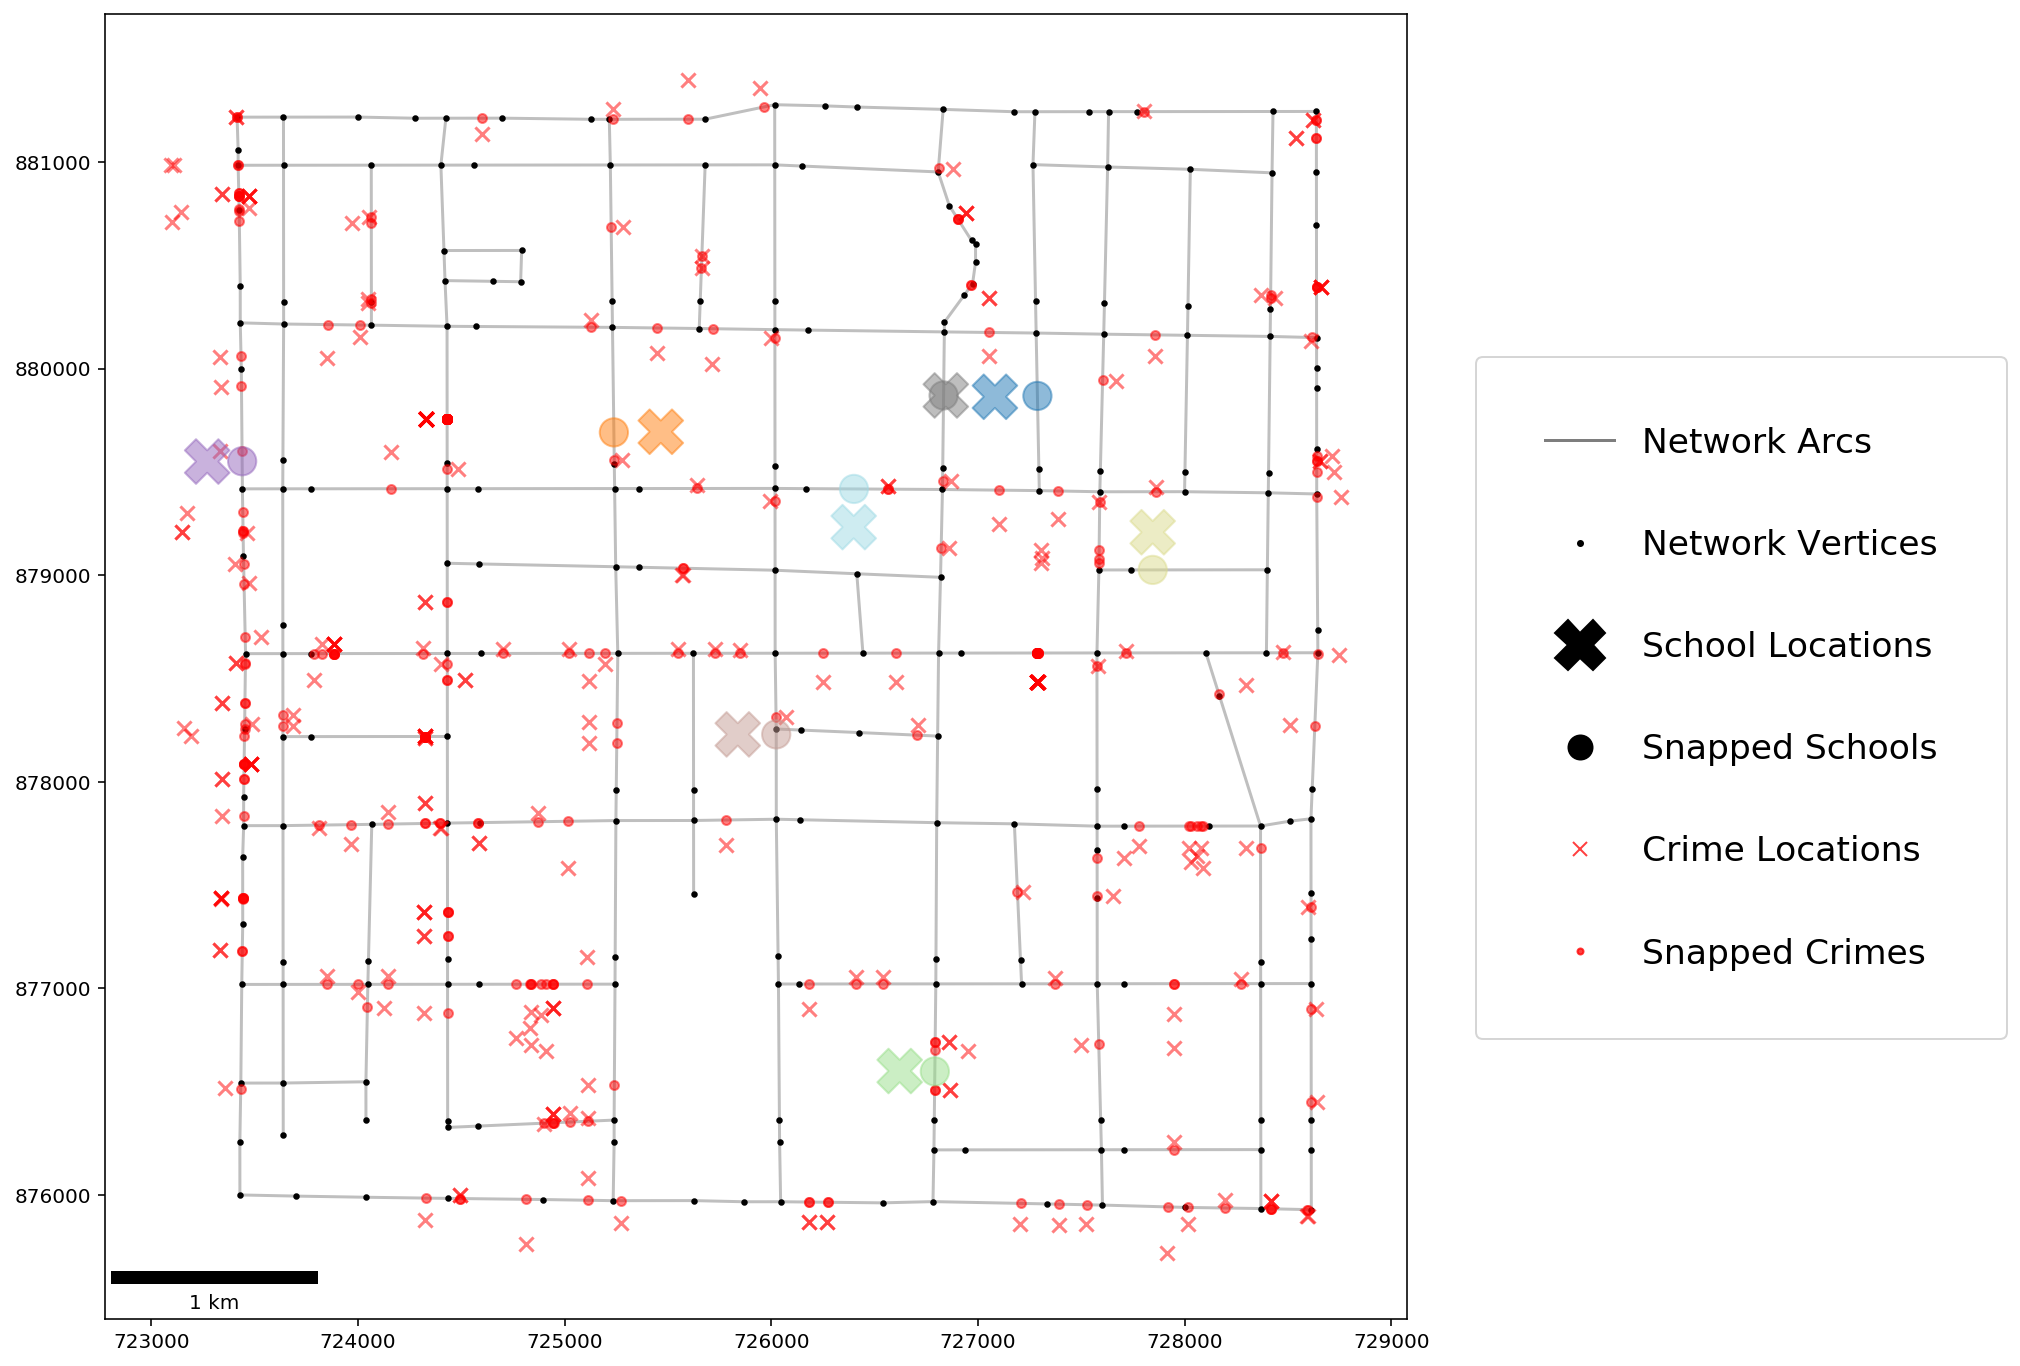

In [18]:
# set the streets as the plot base
base = arcs_df.plot(color="k", alpha=0.25, figsize=(12, 12), zorder=0)

# create vertices keyword arguments for matplotlib
kwargs = {"ax":base}
vertices_df.plot(color="k", markersize=5, alpha=1, **kwargs)

# update crime keyword arguments for matplotlib
kwargs.update({"alpha":0.5, "zorder":1})
true_crimes_df.plot(color="r", marker="x", markersize=50, **kwargs)
snapped_crimes_df.plot(color="r", markersize=20, **kwargs)

# update schools keyword arguments for matplotlib
kwargs.update({"cmap":"tab20", "column":"id", "zorder":2})
true_schools_df.plot(marker="X", markersize=500, **kwargs)
snapped_schools_df.plot(markersize=200, **kwargs)

# add scale bar
scalebar = ScaleBar(1, units="m", location="lower left")
base.add_artist(scalebar)

# add legend
plt.legend(
    handles=patches,
    fancybox=True,
    framealpha=0.8,
    scatterpoints=1,
    fontsize="xx-large",
    bbox_to_anchor=(1.04, 0.75),
    borderpad=2.,
    labelspacing=2.
);

-----------